# Mandatory Assignment 1

#### Part I: Multi-layer Perceptron

***

Please see the description of the assignment in the README file (section 1.2)

In [ ]:
# auxilary imports
import random
import matplotlib.pyplot as plt

# pytorch
import torch
import torch.nn as nn
from torchvision import transforms

##### Import local files

To declutter the notebooks, your are given a module (`/src`) of useful functions. Please study each one as they contain important code (particularly `src.training` and `src.evaluation`). 

In [25]:
# local files
from src.utils import get_device
from src.data import load_torch_data, to_dataloader, train_val_split
from src.training import fit
from src.evaluation import evaluate
from src.visualize import plot_training_history

### Activate GPU
If available. Note that this is not necessary, but it will speed up your training.

In [3]:
# Device will determine whether to run the training on GPU or CPU.
DEVICE = get_device()

Running pytorch version (2.5.1) with backend = mps


### Load data

In [ ]:
# Use transforms.compose method to reformat images for modeling,
# and save to variable preprocessing_stepss for later use.
# Think of this like sci-kit learn's pipeline method.
preprocessing_steps = transforms.Compose(
    [
        transforms.ToTensor(),                  # Convert the image to a pytorch tensor
    ]
)

# load the training/validation data
train_val = load_torch_data(
    dataset="MNIST",
    root = 'data',                     # The root directory where the dataset will be stored
    download = True,                   # If the dataset is not found at root, it will be downloaded
    train = True,                      # The train dataset (as opposed to the test dataset)
    transform = preprocessing_steps  # transformations to be applied to the dataset (only cast to tensor)
)

# load the testing data
test = load_torch_data(
    dataset = "MNIST",
    root = 'data',
    download = True,
    train = False,
    transform = preprocessing_steps
)

f"{len(train_val)=}, {len(test)=}"

'len(train_val)=60000, len(test)=10000'

In [5]:
# split training data in training and validation (just like train_test_split in sklearn)
train, val = train_val_split(train_val, val_ratio=0.2, seed=42)

f"{len(val)=}, {len(train)=}"

'len(val)=12000, len(train)=48000'

In [6]:
# create dataloders for easy batch loading during training
train_loader = to_dataloader(train, batch_size = 64, shuffle = True)
val_loader = to_dataloader(val, batch_size = 64, shuffle = False)
test_loader = to_dataloader(test, batch_size = 64, shuffle = False)

### Inspect data

Default image shape: torch.Size([1, 28, 28])
Reshaped image shape: torch.Size([28, 28])
Total pixels: 784
The label for this image: 8


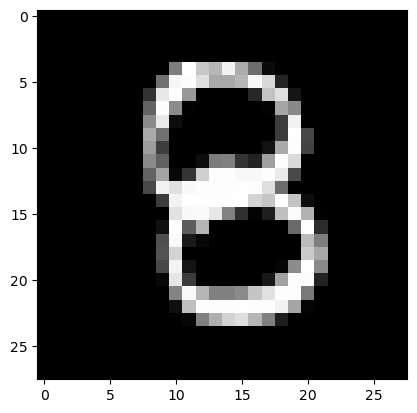

In [7]:
# Pick a random example from the training set
selection = random.randrange(len(train)-1)
image, label = train[selection]

# Plot the image
print(f"Default image shape: {image.shape}")
image = image.view([28,28])

print(f"Reshaped image shape: {image.shape}")
plt.imshow(image, cmap="gray")

print(f"Total pixels: {image.shape[0] * image.shape[1]}")

# Print the label
print(f"The label for this image: {label}")


***

### Build the model

In [8]:
class MLP(nn.Module):

  def __init__(self):
    super().__init__()

    self.fc1 = nn.Linear(28*28,500)
    self.relu = nn.ReLU()
    self.fc2 = nn.Linear(500,10)
  
  def forward(self, X : torch.Tensor):

    logits = self.fc1(X)
    logits = self.relu(logits)
    logits = self.fc2(logits)

    # print(logits.shape)
    return logits

### Hyperparameters

In [9]:
LR = 0.01  # The learning rate
NUM_EPOCHS = 10  # The number of epochs (i.e. passes over the dataset)
criterion = nn.CrossEntropyLoss()  # The loss function

### Instantiate the model and optimizer

In [10]:
model = MLP().to(DEVICE)   # Create an instance of the MLP model and move it to device (GPU or CPU)

# The optimizer 
optimizer = torch.optim.SGD(model.parameters(), lr=LR)

In [11]:
model

MLP(
  (fc1): Linear(in_features=784, out_features=500, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=500, out_features=10, bias=True)
)

### Training

In [ ]:
model, history = fit(
    model,
    train_loader = train_loader,
    val_loader = val_loader,
    device = DEVICE,
    optimizer = optimizer,
    criterion = criterion,
    num_epochs = NUM_EPOCHS
)

Epoch [1/10]: Train Loss: 1.3367, Train Accuracy: 72.81%, Val Loss: 0.6906, Val Accuracy: 84.83%
Epoch [2/10]: Train Loss: 0.5393, Train Accuracy: 86.81%, Val Loss: 0.4651, Val Accuracy: 88.17%
Epoch [3/10]: Train Loss: 0.4149, Train Accuracy: 88.97%, Val Loss: 0.3996, Val Accuracy: 89.26%
Epoch [4/10]: Train Loss: 0.3664, Train Accuracy: 89.86%, Val Loss: 0.3661, Val Accuracy: 89.83%
Epoch [5/10]: Train Loss: 0.3380, Train Accuracy: 90.56%, Val Loss: 0.3444, Val Accuracy: 90.31%
Epoch [6/10]: Train Loss: 0.3184, Train Accuracy: 91.06%, Val Loss: 0.3287, Val Accuracy: 90.64%
Epoch [7/10]: Train Loss: 0.3026, Train Accuracy: 91.48%, Val Loss: 0.3158, Val Accuracy: 91.03%
Epoch [8/10]: Train Loss: 0.2895, Train Accuracy: 91.85%, Val Loss: 0.3042, Val Accuracy: 91.42%
Epoch [9/10]: Train Loss: 0.2779, Train Accuracy: 92.18%, Val Loss: 0.2938, Val Accuracy: 91.63%
Epoch [10/10]: Train Loss: 0.2673, Train Accuracy: 92.51%, Val Loss: 0.2850, Val Accuracy: 92.07%


### Plot loss and accuracy

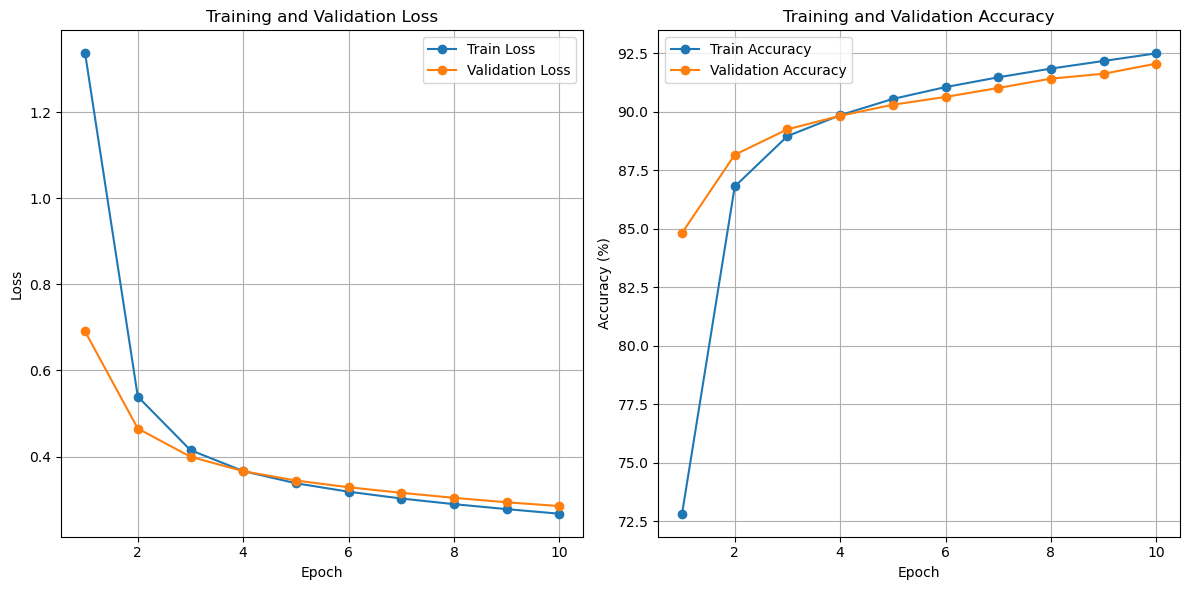

In [17]:
plot_training_history(history)

### Evaluation

In [ ]:
evaluate(
    model = model,
    data_loader = train_loader,  # evaluate on training data
    device = DEVICE,
    criterion = criterion,
)

Evaluation Results:
Loss: 0.2615, Accuracy: 92.71%

Classification Report:
              precision    recall  f1-score   support

    0 - zero       0.95      0.97      0.96      4735
     1 - one       0.95      0.97      0.96      5383
     2 - two       0.91      0.91      0.91      4762
   3 - three       0.92      0.89      0.90      4886
    4 - four       0.91      0.94      0.93      4681
    5 - five       0.90      0.90      0.90      4368
     6 - six       0.94      0.95      0.95      4752
   7 - seven       0.94      0.94      0.94      4983
   8 - eight       0.91      0.89      0.90      4674
    9 - nine       0.92      0.90      0.91      4776

    accuracy                           0.93     48000
   macro avg       0.93      0.93      0.93     48000
weighted avg       0.93      0.93      0.93     48000



In [26]:
evaluate(
    model = model,
    data_loader = val_loader,  # evaluate on training data
    device = DEVICE,
    criterion = criterion,
)

Evaluation Results:
Loss: 0.2850, Accuracy: 92.07%

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1188
           1       0.96      0.96      0.96      1359
           2       0.91      0.90      0.90      1196
           3       0.90      0.90      0.90      1245
           4       0.90      0.93      0.91      1161
           5       0.90      0.90      0.90      1053
           6       0.94      0.94      0.94      1166
           7       0.93      0.94      0.93      1282
           8       0.91      0.91      0.91      1177
           9       0.90      0.86      0.88      1173

    accuracy                           0.92     12000
   macro avg       0.92      0.92      0.92     12000
weighted avg       0.92      0.92      0.92     12000



In [27]:
evaluate(
    model = model,
    data_loader = test_loader,  # evaluate on training data
    device = DEVICE,
    criterion = criterion,
)

Evaluation Results:
Loss: 0.2580, Accuracy: 92.68%

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.96       980
           1       0.97      0.98      0.97      1135
           2       0.92      0.91      0.91      1032
           3       0.92      0.91      0.92      1010
           4       0.90      0.95      0.92       982
           5       0.92      0.89      0.90       892
           6       0.94      0.94      0.94       958
           7       0.93      0.92      0.93      1028
           8       0.91      0.89      0.90       974
           9       0.93      0.89      0.91      1009

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000

